In [136]:
import pandas as pd
from datetime import timedelta

In [137]:
data_file = "data.xlsx"
sheet_name = "Monthly Metrics"
monthly_metrics = pd.read_excel(data_file, sheet_name=sheet_name, skiprows=2, parse_dates=True)
monthly_metrics.columns = ["Month Ending", "Scheduled Service ASMs", "Scheduled Serivce Passengers", "Total System ASMs"]
monthly_metrics.head()

,Month Ending,Scheduled Service ASMs,Scheduled Serivce Passengers,Total System ASMs
0,2013-01-31,593.260,0.514840,618.676
1,2013-02-28,615.237,0.541413,637.949
2,2013-03-31,882.684,0.788405,906.520
3,2013-04-30,678.011,0.591560,697.378
4,2013-05-31,645.429,0.586118,662.268


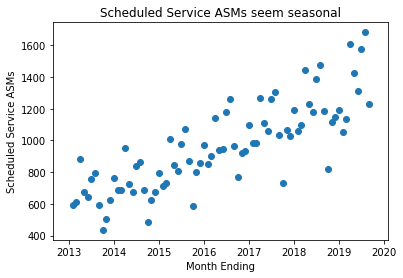

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(list(monthly_metrics["Month Ending"]), list(monthly_metrics["Scheduled Service ASMs"]))
plt.xlabel("Month Ending")
plt.ylabel("Scheduled Service ASMs")
plt.title("Scheduled Service ASMs seem seasonal")
plt.show()

In [139]:
def predict(column_name):
    df = monthly_metrics[column_name][0:80]
    df.index = monthly_metrics["Month Ending"][0:80]
    stepwise_model = pm.auto_arima(df, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12, max_P=5, max_Q=5,
                           start_P=0, seasonal=True,
                           d=None, D=None, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, test="adf",
                           stepwise=True)
    print(stepwise_model.aic())
    
    stepwise_model.fit(df)    
    
    # diagnostics
    stepwise_model.plot_diagnostics(figsize=(7,5))
    plt.show()
    
    # Forecast
    n_periods = 12
    fitted, confint = stepwise_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df.index[-1]+timedelta(days=1), periods = n_periods, freq='M')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.plot(df)
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("Sesonal ARIMA - 12 month forecast")
    plt.xlabel("Month Ending")
    plt.ylabel(column_name)
    plt.show()
    return fitted_series
    

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=732.400, BIC=743.498, Fit time=0.899 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=745.051, BIC=749.490, Fit time=0.021 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=730.621, BIC=739.499, Fit time=0.641 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=733.544, BIC=742.423, Fit time=0.537 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=730.144, BIC=736.802, Fit time=0.174 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 1, 12); AIC=730.588, BIC=739.466, Fit time=0.318 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 1, 12); AIC=732.561, BIC=743.658, Fit time=0.979 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=731.839, BIC=740.717, Fit time=0.120 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=731.673, BIC=740.551, Fit time=0.281 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 

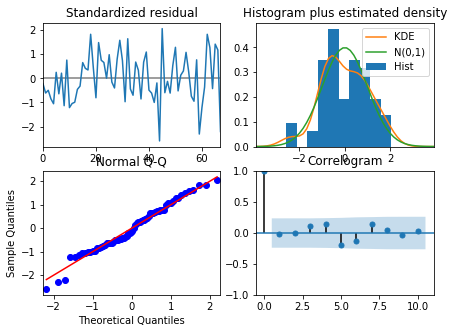

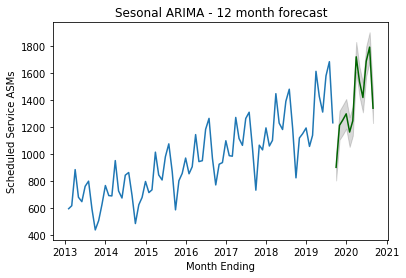

In [140]:
fitted_ss_asm = predict("Scheduled Service ASMs")

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=-207.562, BIC=-196.465, Fit time=0.484 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=-199.961, BIC=-195.522, Fit time=0.119 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=-209.625, BIC=-200.747, Fit time=0.925 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=-207.502, BIC=-198.624, Fit time=0.675 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=-211.178, BIC=-204.519, Fit time=0.132 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 1, 12); AIC=-209.564, BIC=-200.686, Fit time=0.625 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 1, 12); AIC=-207.650, BIC=-196.553, Fit time=1.445 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=-209.205, BIC=-200.327, Fit time=0.308 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=-209.216, BIC=-200.338, Fit time=0.281 seconds
Fit ARIMA: order=(2, 0, 1) s

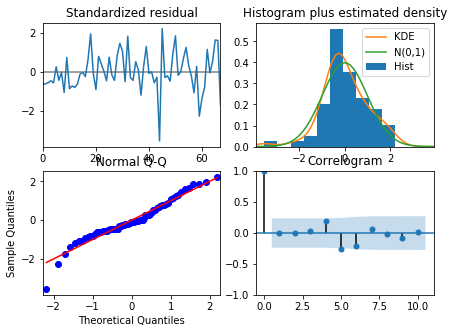

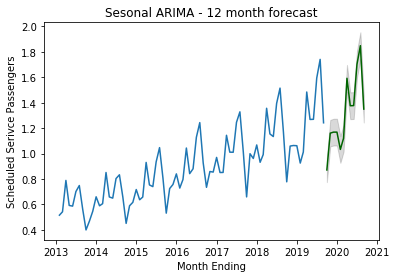

In [141]:
fitted_ssp = predict("Scheduled Serivce Passengers")

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=729.071, BIC=740.094, Fit time=0.946 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=740.629, BIC=745.038, Fit time=0.024 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=737.470, BIC=746.288, Fit time=0.332 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=731.764, BIC=740.583, Fit time=0.406 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=731.048, BIC=744.276, Fit time=1.218 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=728.580, BIC=737.399, Fit time=0.314 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=731.199, BIC=737.813, Fit time=0.121 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=730.386, BIC=741.409, Fit time=0.549 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=737.233, BIC=743.847, Fit time=0.145 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 

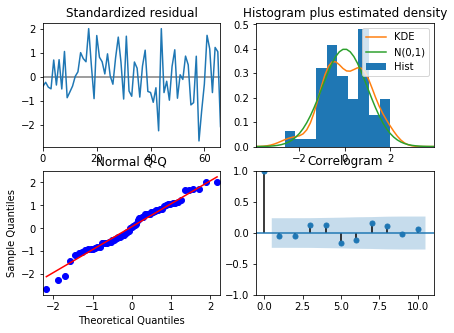

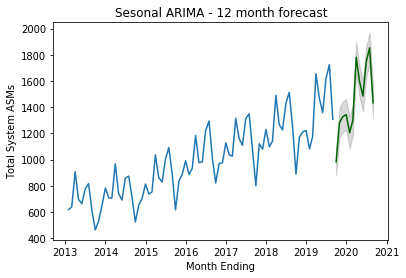

In [142]:
fitted_ts_asm = predict("Total System ASMs")

In [143]:
print(fitted_ss_asm.values) # Scheduled Service ASMs

[ 899.62976789 1210.67002886 1250.33380202 1295.90282563 1160.97213538
 1244.31360254 1718.19647926 1533.07193819 1416.78600651 1684.90611456
 1789.95502813 1337.48244882]


In [144]:
print(fitted_ssp) # Scheduled Serivce Passengers

2019-09-30    0.870651
2019-10-31    1.160560
2019-11-30    1.168625
2019-12-31    1.168454
2020-01-31    1.032490
2020-02-29    1.120053
2020-03-31    1.592235
2020-04-30    1.376254
2020-05-31    1.377404
2020-06-30    1.702112
2020-07-31    1.848984
2020-08-31    1.349835
Freq: M, dtype: float64


In [145]:
print(fitted_ts_asm) # Total System ASMs

2019-09-30     982.765245
2019-10-31    1282.232045
2019-11-30    1327.608834
2019-12-31    1343.771692
2020-01-31    1204.735598
2020-02-29    1299.329018
2020-03-31    1781.425555
2020-04-30    1597.700510
2020-05-31    1485.132071
2020-06-30    1745.676363
2020-07-31    1853.531978
2020-08-31    1435.174977
Freq: M, dtype: float64
